In [43]:
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_path import path
from pathlib import Path
from PIL import Image

import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = '15'

In [2]:
DATA_DIR = Path.cwd().parent / "data/raw/train"
TRAIN_FEATURES = DATA_DIR / "train_features"
TRAIN_LABELS = DATA_DIR / "train_labels"

#assert TRAIN_FEATURES.exists()

In [3]:
train_meta = pd.read_csv(DATA_DIR / "train_metadata.csv")
train_meta.head()

,chip_id,location,datetime,cloudpath
0,adwp,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwp
1,adwu,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwu
2,adwz,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwz
3,adxp,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adxp
4,aeaj,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aeaj


## EDA of metadata

In [7]:
print('We have', len(train_meta), 'unique aerial images')

We have 11748 unique aerial images


#### Location count

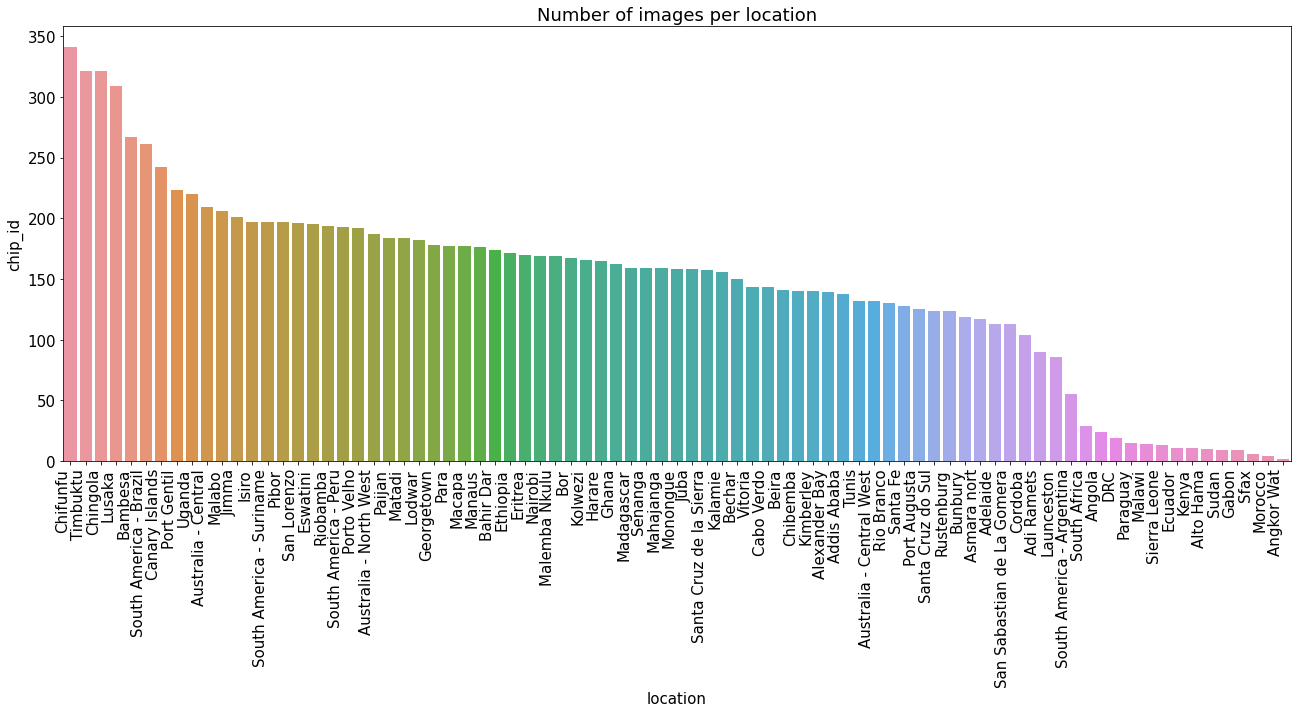

In [45]:
location_count = train_meta.groupby("location").count().sort_values('chip_id', ascending=False)
fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.barplot(x=location_count.index, y='chip_id', data=location_count, ax=ax)
ax.set_title('Number of images per location');
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right');

Most of the locations have more than 100 images with around 10 locations having less than 25 images.

#### Time span of the aerial images

In [57]:
datetime = train_meta.copy()
datetime['year'] = pd.to_datetime(datetime['datetime']).dt.year
datetime['month'] = pd.to_datetime(datetime['datetime']).dt.month
datetime = datetime.sort_values(['year', 'month'], ascending=True)

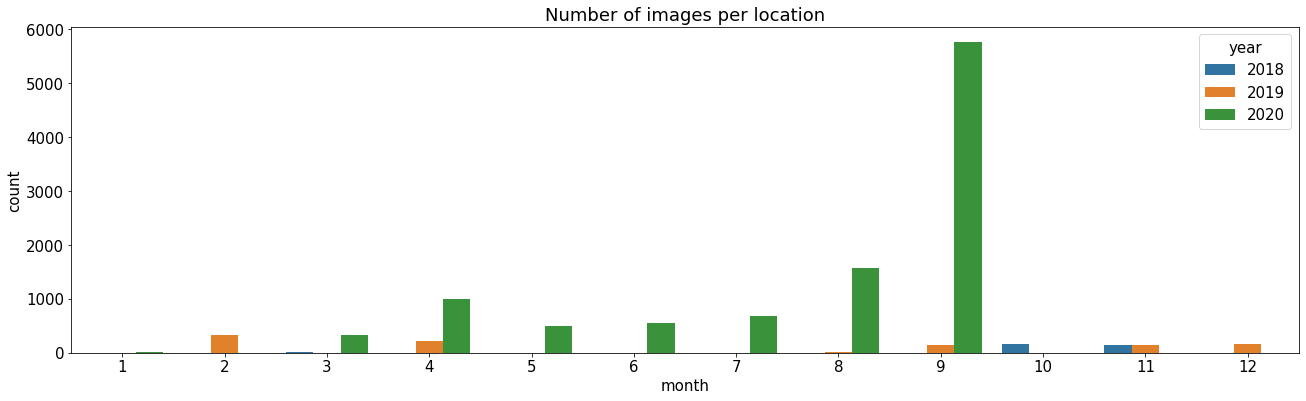

In [60]:
fig, ax = plt.subplots(1,1, figsize=(22,6))
sns.countplot(x='month', hue='year', data=datetime, ax=ax)
ax.set_title('Number of images per location');